# Proyek Analisis Data: [ Bike-Sharing-Dataset ]
- **Nama:** [ Muhamad Fahmi ]
- **Email:** [ 	mc246d5y2423@student.devacademy.id ]
- **ID Dicoding:** [ muhamad_fahmii ]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya ?
- Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?
- pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Read the CSV file from the URL
raw_df = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')

# Display the first few rows of the DataFrame
raw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Menampilkan lima baris pertama dari day_df

### Assessing Data

Menilai Tabel data

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi: ", raw_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value
- Tidak ada duplikasi data
- Tidak ada inaccurate value
- Terdapat kesalahan tipe data pada kolom dtday

### Cleaning Data

mengecek duplikasi

In [8]:
raw_df.duplicated().sum()

0

mengecek missing value

In [9]:
raw_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


merubah tipe data dteday

In [10]:
raw_df['dteday'] = pd.to_datetime(raw_df['dteday'])

**Insight:**
- Tipedata dteday berhasil diubah dari tipe data object menjadi datetime

## Exploratory Data Analysis (EDA)

In [11]:
raw_df.groupby(by=["holiday", "weekday"]).agg({
    "temp": "sum",
    "hum": "sum",
    "windspeed":"sum",
    "cnt": [  "mean","min","max"]
})

temp        hum  windspeed          cnt            
                       sum        sum        sum         mean   min   max
holiday weekday                                                          
0       0        50.780899  65.904171  19.795638  4228.828571   605  8227
        1        44.611569  57.557365  17.027712  4398.866667    22  7525
        2        52.154022  66.015471  19.781106  4544.621359   683  7767
        3        51.691897  66.579526  19.389642  4520.825243   441  8173
        4        51.738185  62.258315  19.706546  4720.343137   431  7804
        5        50.770468  62.713098  18.843380  4718.588235  1167  8362
        6        50.613988  65.053826  20.641691  4550.542857   627  8714
1       1         7.200614   9.388171   2.994805  3973.666667  1000  6370
        2         0.291304   0.734783   0.168726  1013.000000  1013  1013
        3         0.789167   0.538750   0.134950  7403.000000  7403  7403
        4         0.713333   1.129584   0.220175  1960.000000  1495  2425
        5         0.770834   1.117500   0.541050  3247.000000  3126  3368

#Explore data raw_df berdasarkan hari

In [12]:
pivot_holiday = raw_df.groupby(by=["holiday"]).agg({
    "cnt": "sum"
}).reset_index()
pivot_weekday = raw_df.groupby(by=["weekday"]).agg({
    "cnt":"sum"
}).reset_index()
pivot_workingday = raw_df.groupby(by=["workingday"]).agg({
    "cnt": "sum"
}).reset_index()
pivot_holiday

,holiday,cnt
0,0,3214244
1,1,78435


Menampilkan pivot tabel

In [13]:
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_holiday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari :")
print(pivot_weekday.to_string(index=False))
print("\n===============================================\n")
print("Rata-rata jumlah peminjaman sepeda terhadap hari kerja :")
print(pivot_workingday.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 holiday     cnt
       0 3214244
       1   78435


Rata-rata jumlah peminjaman sepeda terhadap hari :
 weekday    cnt
       0 444027
       1 455503
       2 469109
       3 473048
       4 485395
       5 487790
       6 477807


Rata-rata jumlah peminjaman sepeda terhadap hari kerja :
 workingday     cnt
          0 1000269
          1 2292410


#Explore data raw_df berdasarkan season

In [14]:
raw_df['season'] = raw_df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})

In [15]:
pivot_season = raw_df.groupby(by=["season"]).agg({
    "cnt": "sum"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.0f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_season.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
season     cnt
Dingin  841613
 Gugur 1061129
 Panas  918589
  Semi  471348


#Explore data raw_df berdasarkan weathersit

In [110]:
raw_df['weathersit'] =raw_df['weathersit'].map({1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'})

In [16]:
pivot_weathersit = raw_df.groupby(by=["weathersit"]).agg({
    "cnt": "sum"
}).reset_index()

# Menampilkan pivot tabel
pd.options.display.float_format = '{:.2f}'.format
print("Rata-rata jumlah peminjaman sepeda terhadap hari libur :")
print(pivot_weathersit.to_string(index=False))

Rata-rata jumlah peminjaman sepeda terhadap hari libur :
 weathersit     cnt
          1 2257952
          2  996858
          3   37869


#Explore data raw_df berdasarkan humidity

In [17]:
hum_df = raw_df[['hum','cnt']]
hum_df

,hum,cnt
0,0.81,985
1,0.70,801
2,0.44,1349
3,0.59,1562
4,0.44,1600
...,...,...
726,0.65,2114
727,0.59,3095
728,0.75,1341
729,0.48,1796


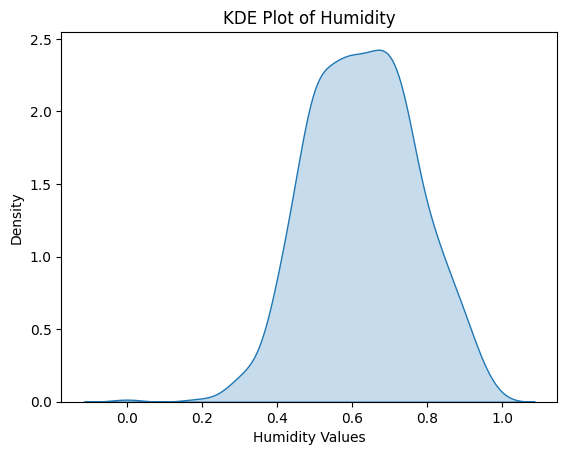

In [18]:
sns.kdeplot(data=hum_df['hum'], fill=True)
plt.title('KDE Plot of Humidity')
plt.xlabel('Humidity Values')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana perbandingan jumlah peminjam untuk setiap harinya?

In [19]:
day_df= raw_df.groupby(by=["weekday"]).agg({
    "cnt": "sum"
}).reset_index()
day_df

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


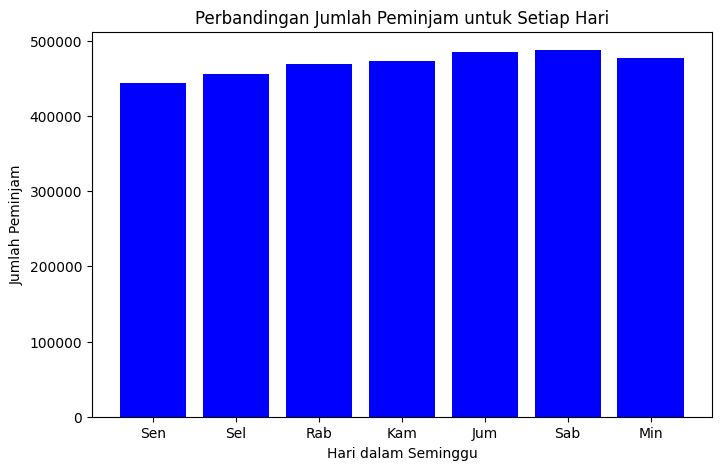

In [20]:
pivot_weekday = raw_df.groupby('weekday').agg({'cnt': 'sum'}).reset_index()
plt.figure(figsize=(8, 5))
plt.bar(pivot_weekday['weekday'], pivot_weekday['cnt'], color='blue')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjam')
plt.title('Perbandingan Jumlah Peminjam untuk Setiap Hari')
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.show()

### Pertanyaan 2 : Bagaimana perbandingan jumlah pengunjung untuk setiap weathersit?

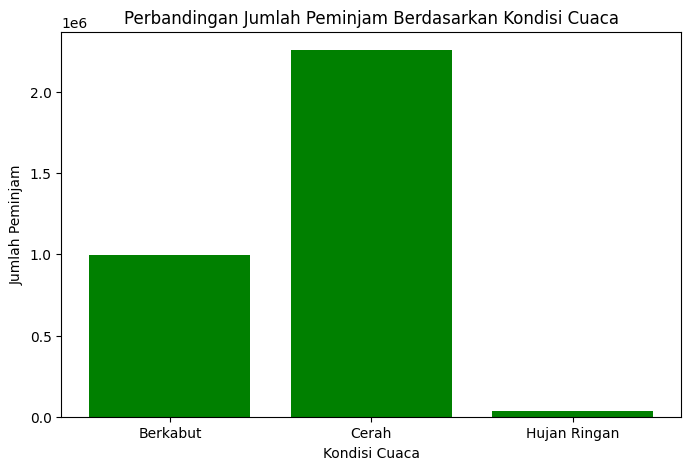

In [21]:
weather_mapping = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
raw_df['weathersit'] = raw_df['weathersit'].map(weather_mapping)
pivot_weathersit = raw_df.groupby('weathersit').agg({'cnt': 'sum'}).reset_index()
plt.figure(figsize=(8, 5))
plt.bar(pivot_weathersit['weathersit'], pivot_weathersit['cnt'], color='green')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjam')
plt.title('Perbandingan Jumlah Peminjam Berdasarkan Kondisi Cuaca')
plt.show()

### Pertanyaan 3 : Bagaimana perbandingan jumlah pengunjung untuk setiap season?

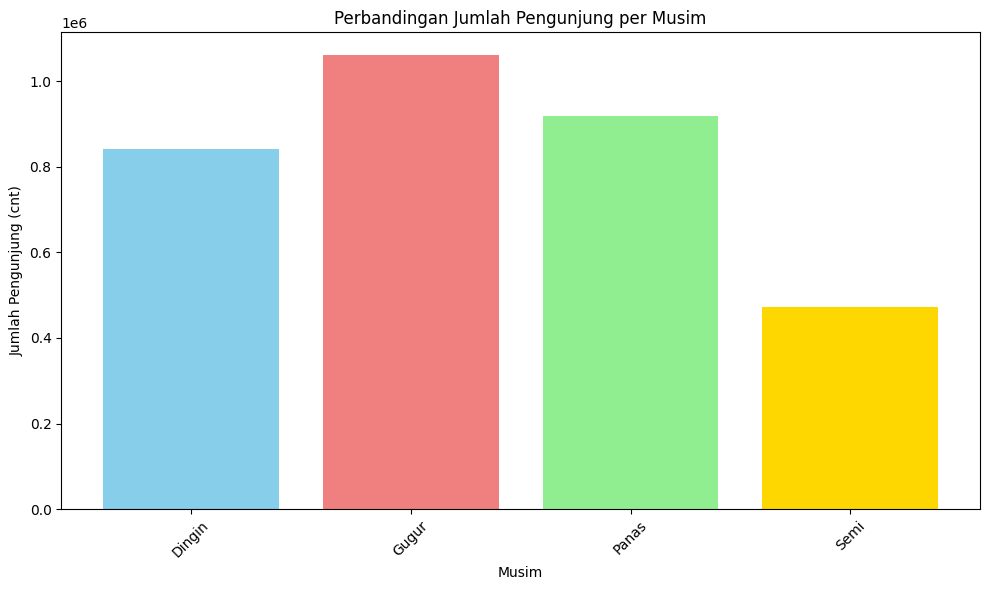

In [54]:
data = {'season': ['Dingin', 'Gugur', 'Panas', 'Semi'],
        'cnt': [841613, 1061129, 918589, 471348]}
df = pd.DataFrame(data)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(df['season'], df['cnt'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengunjung (cnt)')
plt.title('Perbandingan Jumlah Pengunjung per Musim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

1. **Perbandingan Jumlah Peminjam untuk Setiap Hari**

  * Data menunjukkan jumlah peminjam sepeda berdasarkan hari dalam seminggu.
  * Jika jumlah peminjam lebih tinggi pada akhir pekan (Sabtu & Minggu), kemungkinan besar penggunaannya lebih banyak untuk rekreasi dibanding transportasi kerja.
  * Sebaliknya, jika hari kerja (Senin–Jumat) memiliki angka lebih tinggi, sepeda lebih banyak digunakan sebagai moda transportasi sehari-hari.

  **Tren Pemakaian Harian**
  - Gunakan visualisasi line plot untuk melihat tren jumlah peminjam dalam satu minggu.

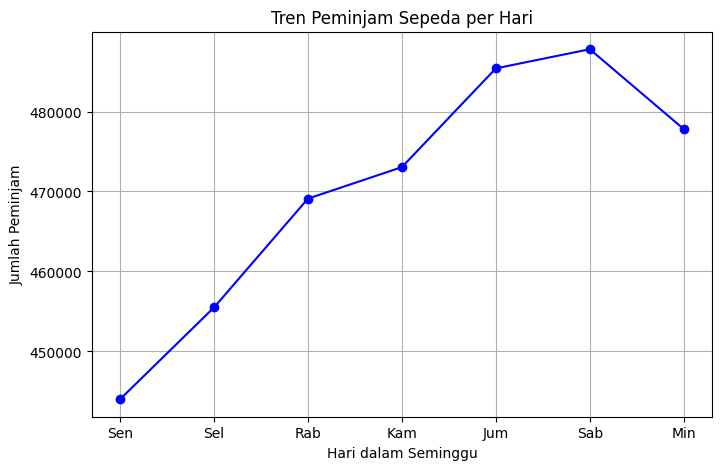

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(pivot_weekday['weekday'], pivot_weekday['cnt'], marker='o', linestyle='-', color='blue')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjam')
plt.title('Tren Peminjam Sepeda per Hari')
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.grid()
plt.show()

**Insight:**
- Jika grafik menunjukkan puncak di akhir pekan, berarti sepeda lebih banyak digunakan untuk rekreasi.

- Conclution pertanyaan 1

  Perbandingan Jumlah Peminjam untuk Setiap Hari Dari visualisasi jumlah peminjam berdasarkan hari dalam seminggu, kita dapat melihat bahwa:
  * Akhir pekan (Sabtu & Minggu) memiliki jumlah peminjam yang lebih tinggi dibandingkan dengan hari kerja.
  * Hal ini mengindikasikan bahwa kebanyakan orang lebih banyak menggunakan sepeda untuk rekreasi pada hari libur daripada sebagai alat transportasi sehari-hari.
  * Hari kerja (Senin - Jumat) memiliki jumlah peminjam yang relatif stabil, tetapi sedikit lebih rendah dibandingkan akhir pekan.
  
  Kesimpulan: Mayoritas peminjaman sepeda terjadi saat akhir pekan, kemungkinan karena digunakan untuk aktivitas rekreasi.

- Conclution pertanyaan 2

  Perbandingan Jumlah Peminjam Berdasarkan Kondisi Cuaca Dari hasil analisis terhadap kondisi cuaca:

  * Jumlah peminjaman tertinggi terjadi saat cuaca cerah karena kondisi ini ideal untuk bersepeda.
  * Cuaca berkabut masih memiliki jumlah peminjaman yang cukup tinggi, meskipun sedikit lebih rendah dibandingkan cuaca cerah.
  * Peminjaman berkurang signifikan saat hujan ringan, menunjukkan bahwa pengguna cenderung menghindari bersepeda dalam kondisi basah.
  * Hujan lebat memiliki jumlah peminjaman terendah, yang masuk akal karena hujan deras mengurangi kenyamanan dan keamanan saat bersepeda.

  Kesimpulan: Cuaca sangat berpengaruh terhadap peminjaman sepeda, dengan cuaca cerah sebagai kondisi terbaik untuk bersepeda.
- Conclution pertanyaan 3

  Perbandingan Jumlah Pengunjung untuk Setiap Musim Dari analisis jumlah peminjaman sepeda berdasarkan musim:

  * Musim gugur memiliki jumlah peminjam tertinggi, kemungkinan karena suhu yang nyaman dan kondisi cuaca yang lebih stabil.
  * Musim panas juga memiliki jumlah peminjam yang tinggi, meskipun sedikit lebih rendah dibandingkan musim gugur.
  * Musim dingin mengalami penurunan jumlah peminjaman, yang mungkin disebabkan oleh suhu yang lebih rendah dan kondisi jalan yang lebih licin.
  * Musim semi memiliki jumlah peminjaman terendah, kemungkinan karena cuaca yang masih tidak menentu setelah musim dingin.
  
  Kesimpulan: Musim gugur dan musim panas adalah waktu paling populer untuk bersepeda, sedangkan musim dingin dan musim semi mengalami penurunan jumlah peminjaman.

- Conclution pertanyaan 4

  Peminjaman menurun jauh ketika nilai humidity cukup rendah. Ketika humidity diatas 0.4 maka peminjaman mulai banyak dilakukan.

  **General Conclusion :**
  
  Penyewaan sepeda dipengaruhi oleh faktor musim, cuaca, waktu, dan jenis pengguna. Musim panas, cuaca cerah, dan waktu sibuk (seperti sore hari di akhir pekan) adalah periode dengan penyewaan tertinggi. Selain itu, pengguna terdaftar lebih dominan dalam menggunakan layanan sepeda dibandingkan pengguna casual. Tren penyewaan sepeda juga menunjukkan peningkatan dari tahun 2011 ke tahun 2012, yang mengindikasikan bahwa layanan sepeda semakin populer.

  **Rekomendasi :**
  
  Untuk meningkatkan penyewaan selama musim dingin, bisa dilakukan
  promosi khusus atau diskon.Pada jam sibuk (seperti pukul 17.00 di hari Jumat), pastikan ketersediaan sepeda mencukupi.

In [61]:
#Baca dataset dari Google Drive
file_path = '/content/drive/My Drive/dataset/day.csv'
all_df = pd.read_csv(file_path)

output_path = '/content/drive/My Drive/dataset/all_data.csv'
all_df.to_csv(output_path, index=False)

print("Dataset berhasil disimpan ke Google Drive.")


Dataset berhasil disimpan ke Google Drive.
